In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D 
from tensorflow.keras.applications import MobileNet 
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import glob
import numpy as np
import math

# root dir
# data root dir
# train data root dir
# test data root dir

In [ ]:
import os

ROOT_DIR = '/content'

DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'brain_tumor')

TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'Training')

TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'Testing')

# Google Drive 마운트해서 데이터셋 가져옴

In [ ]:
from google.colab import drive   

drive.mount('/content/gdrive/')  

Mounted at /content/gdrive/


In [ ]:
import shutil
import os

try:
    dataset_path = '/content/gdrive/My Drive/Colab Notebooks/dataset'
    
    shutil.copy(os.path.join(dataset_path, 'brain_tumor.zip'), '/content')

except Exception as err:
    print(str(err))

In [ ]:
import os
import shutil

if os.path.exists(DATA_ROOT_DIR):
    
    shutil.rmtree(DATA_ROOT_DIR)
    
    print(DATA_ROOT_DIR + ' is removed !!!')

In [ ]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'brain_tumor.zip'), 'r') as target_file:

    target_file.extractall(DATA_ROOT_DIR) 

# brain_tumor/Testing 확인
# brain_tumor/Training 확인

In [ ]:
import os

#========================================================
# train 정답 및 전체 데이터 개수 확인
#========================================================

train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(train_label_name_list)

for label_name in train_label_name_list:

    print('train label : ', label_name,' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#========================================================
# test 정답 및 전체 데이터 개수 확인
#========================================================

test_label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(test_label_name_list)

for label_name in test_label_name_list:

    print('test label : ', label_name, ' => ', len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))))

print('=====================================================')

['no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']
train label :  no_tumor  =>  395
train label :  pituitary_tumor  =>  827
train label :  glioma_tumor  =>  826
train label :  meningioma_tumor  =>  822
['no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']
test label :  no_tumor  =>  105
test label :  pituitary_tumor  =>  74
test label :  glioma_tumor  =>  100
test label :  meningioma_tumor  =>  115


# Testing 디렉토리 모든 파일을 Training 동일 디렉토리로 move

In [ ]:
test_label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(test_label_name_list)

for label_name in test_label_name_list:  # Testing 디렉토리 각각의 label 에서 실행

    test_path = os.path.join(TEST_DATA_ROOT_DIR, label_name)

    test_file_list = os.listdir(test_path)

    train_path = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)

    moved_num = 0

    for test_image_file in test_file_list:  # Testing 모든 data를 Training 디렉토리로 이동

        # already exists error 방지
        # 참고소스: https://stackoverflow.com/questions/31813504
        shutil.move(os.path.join(test_path, test_image_file),
                    os.path.join(train_path, test_image_file))

        moved_num = moved_num + 1

    print(str(moved_num) + ' is moved into ' + label_name + ' (Testing => Training)')

['no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']
105 is moved into no_tumor (Testing => Training)
74 is moved into pituitary_tumor (Testing => Training)
100 is moved into glioma_tumor (Testing => Training)
115 is moved into meningioma_tumor (Testing => Training)


# move 완료된 train 전체 데이터 개수 확인

In [ ]:
#========================================================
# train 정답 및 전체 데이터 개수 확인
#========================================================

train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(train_label_name_list)

for label_name in train_label_name_list:

    print('train label : ', label_name,' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

['no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']
train label :  no_tumor  =>  396
train label :  pituitary_tumor  =>  901
train label :  glioma_tumor  =>  926
train label :  meningioma_tumor  =>  937


# move 비율 설정

In [ ]:
# 파일 move 비율

MOVE_RATIO = 0.2  # train : test = 80 : 20, 즉 train 데이터 20% 데이터를 test 데이터로 사용

In [ ]:
import os
import glob
import shutil
import random

# 파일 move train_data_dir => test_data_dir

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

for label_name in label_name_list:

    # 파일 move 하기 위한 src_dir_path, dst_dir_path 설정
    #=========================================================
    src_dir_path = os.path.join(TRAIN_DATA_ROOT_DIR,label_name)  
    dst_dir_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)  
    #=========================================================

    train_data_file_list = os.listdir(src_dir_path)

    print('========================================================================')
    print('total [%s] data file nums => [%s]' % (label_name ,len(train_data_file_list)))

    # data shuffle
    random.shuffle(train_data_file_list)
    print('train data shuffle is done !!!')

    split_num = int(MOVE_RATIO*len(train_data_file_list))

    print('split nums => ', split_num)

    # extract test data from train data
    test_data_file_list = train_data_file_list[0:split_num]

    move_nums = 0

    for test_data_file in test_data_file_list:

        try:
            shutil.move(os.path.join(src_dir_path, test_data_file),
                        os.path.join(dst_dir_path, test_data_file))   
        except Exception as err:
            print(str(err))

        move_nums = move_nums + 1

    print('total move nums => ', move_nums)
    print('========================================================================')

total [no_tumor] data file nums => [396]
train data shuffle is done !!!
split nums =>  79
total move nums =>  79
total [pituitary_tumor] data file nums => [901]
train data shuffle is done !!!
split nums =>  180
total move nums =>  180
total [glioma_tumor] data file nums => [926]
train data shuffle is done !!!
split nums =>  185
total move nums =>  185
total [meningioma_tumor] data file nums => [937]
train data shuffle is done !!!
split nums =>  187
total move nums =>  187


# train data, test data 개수 확인

In [ ]:
import os

#==============================================================================
# train 파일 개수 확인
#==============================================================================

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)

    print('train label : ' + label_name + ' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#==============================================================================


#==============================================================================
# test 파일 개수 확인
#==============================================================================

label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TEST_DATA_ROOT_DIR, label_name)

    print('test label : ' + label_name + ' => ', len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#==============================================================================

['no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']
train label : no_tumor =>  317
train label : pituitary_tumor =>  721
train label : glioma_tumor =>  741
train label : meningioma_tumor =>  750
['no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']
test label : no_tumor =>  79
test label : pituitary_tumor =>  180
test label : glioma_tumor =>  185
test label : meningioma_tumor =>  187


# 이미지 shape 설정

In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

# ImageDataGenerator 이용하여 데이터 불러옴

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_ROOT_DIR, batch_size=32,
                                                color_mode='rgb', class_mode='sparse',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT))


test_generator = test_datagen.flow_from_directory(TEST_DATA_ROOT_DIR, batch_size=32, 
                                              color_mode='rgb', class_mode='sparse',
                                              target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 2529 images belonging to 4 classes.
Found 631 images belonging to 4 classes.


In [ ]:
print(train_generator.class_indices)
print(train_generator.num_classes)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
4


# 32 개의 데이터와 정답 가져와서 16개 출력

In [ ]:
IMG_NUMS = 16

image_data, label_data = train_generator.next()

data = image_data[:IMG_NUMS]

label = label_data[:IMG_NUMS]

print(data.shape, label.shape)
print(label)

(32, 224, 224, 3) (32,)
[1. 3. 0. 0. 0. 3. 0. 1. 0. 0. 3. 2. 3. 1. 0. 3. 3. 1. 0. 1. 0. 0. 2. 1.
 3. 1. 0. 0. 1. 3. 2. 2.]


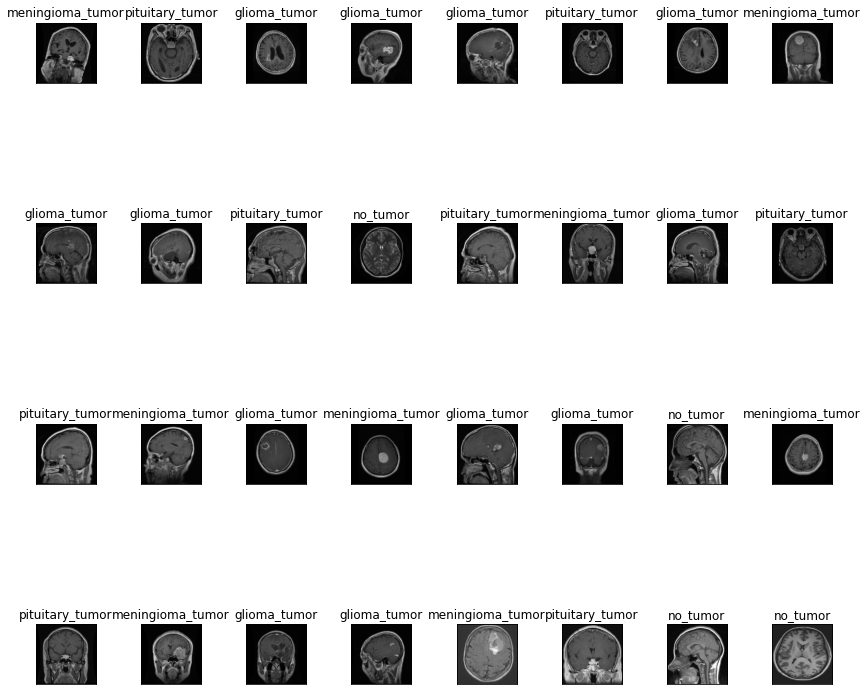

In [ ]:
import matplotlib.pyplot as plt

class_dict = { 0:'glioma_tumor', 1:'meningioma_tumor', 2:'no_tumor', 3:'pituitary_tumor'}

plt.figure(figsize=(8,8))

for i in range(len(label)):

    plt.subplot(4, 4, i+1)
    plt.title(str(class_dict[label[i]]))
    plt.xticks([]);  plt.yticks([])

    plt.imshow(data[i])

plt.tight_layout()
plt.show()

# Fine Tuning 위한 pre-trained model 정의 및 모델 구축

In [ ]:
pre_trained_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

pre_trained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
class_nums = train_generator.num_classes  # 정답개수

model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_nums, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
            optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,          # 5회 Epoch동안 개선되지 않는다면 종료
                              verbose=1)


start_time = datetime.now()

hist = model.fit(train_generator, epochs=50, validation_data=test_generator, callbacks=[earlystopping])

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/50
80/80 [==============================] - 43s 481ms/step - loss: 1.6557 - acc: 0.3567 - val_loss: 1.0440 - val_acc: 0.6022
Epoch 2/50
80/80 [==============================] - 37s 467ms/step - loss: 1.1466 - acc: 0.5310 - val_loss: 0.8506 - val_acc: 0.6926
Epoch 3/50
80/80 [==============================] - 37s 466ms/step - loss: 0.8732 - acc: 0.6449 - val_loss: 0.7446 - val_acc: 0.7448
Epoch 4/50
80/80 [==============================] - 37s 466ms/step - loss: 0.7195 - acc: 0.7110 - val_loss: 0.6369 - val_acc: 0.7829
Epoch 5/50
80/80 [==============================] - 38s 468ms/step - loss: 0.6300 - acc: 0.7635 - val_loss: 0.5678 - val_acc: 0.7734
Epoch 6/50
80/80 [==============================] - 38s 469ms/step - loss: 0.5212 - acc: 0.8074 - val_loss: 0.5503 - val_acc: 0.7734
Epoch 7/50
80/80 [==============================] - 37s 466ms/step - loss: 0.4790 - acc: 0.8225 - val_loss: 0.5137 - val_acc: 0.7861
Epoch 8/50
80/80 [==============================] - 37s 467ms/step - 

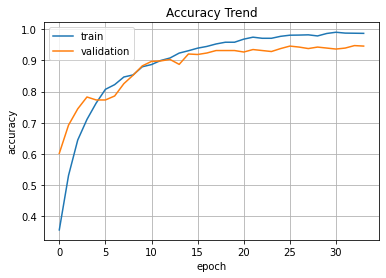

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

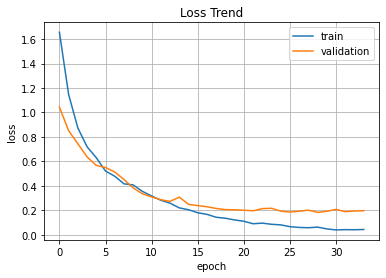

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
model.evaluate(test_generator)

20/20 [==============================] - 3s 168ms/step - loss: 0.1975 - acc: 0.9461


[0.19745692610740662, 0.9461172819137573]